***
Nick Featherstone (January, 2018)

**NOTE:**  This document  can be viewed in PDF or HTML (recommended) form.  It can also be run as an interactive Jupyter notebook.

The HTML and PDF versions are located in Rayleigh/doc/Diagnostic_Plotting.{html,pdf}  
The Jupyter notebook is located in Rayleigh/post_processing/Diagnostic_Plotting.ipynb  
Standalone Python example scripts for each output type may also found in Rayleigh/post_processing/

Contents
=======
1.  Running a Benchmark with Sample Output
2.  Configuring your Python environment
3.  Overview of Rayleigh's Diagnostic Package
4.  Global Averages
5.  Shell Averages
6.  Azimuthal Averages
7.  Simulation Slices 
8.  Spherical Harmonic Spectra
9.  Point Probes
10.  Modal Outputs

I.  Running a Benchmark with Sample Output
=======================

Before you can plot data, you will need to generate data.   The code samples in this notebook assume that you have run the model described by the input file found in:

rayleigh/input_examples/benchmark_diagnostics_input

This input file instructs *Rayleigh* to run the Christensen et al. (2001) hydrodynamic (case 0) benchmark.  Running this model with the prescribed outputs will generate approximately 70 MB of data.  

To run this model:
1. Create a directory for your simulation (e.g., **mkdir my_test_run**)
2. Copy the input file:  **cp rayleigh/input_examples/benchmark_diagnostics_input my_test_run/main_input** 
3. Copy or soft-link the *rayleigh* executable:  **cp Rayleigh/bin/rayleigh.opt my_test_run/.**
4. Run the code:  **mpiexec -np N ./rayleigh -nprow n -npcol m**  (choose values of {N,n,m} such that n x m = N)

The code will run for 40,000 timesteps, or four viscous diffusion times.   While it runs, *Rayleigh* will perform an in-situ analysis of the accuracy benchmark.   Reports are written once every 1,000 time steps and are stored in the *Benchmark_Reports* subdirectory.  Examine file 00030000 and ensure that you see similar results to those below.  Your exact numbers may differ slightly, but all quantities should be under 1% difference. 



 |  Observable      |    Measured    | Suggested   | % Difference |  Std. Dev.|
 |------------------|----------------|-------------|--------------|----------|
|   Kinetic Energy  |     58.347827   |  58.348000   |  -0.000297   |   0.000000 |
|   Temperature     |      0.427424   |   0.428120   |  -0.162460   |   0.000101 |
|   Vphi            |    -10.119483   | -10.157100   |  -0.370356   |   0.013835 |
|   Drift Frequency |      0.183016   |   0.182400   |   0.337630   |   0.007295 |


If necessary, copy the data to the system on which you intend to conduct your analysis.  Before you can plot, you will need to configure your Python environment.  



II.  Configuring Your Python Environment
=============
Rayleigh comes packaged with a Python library (*rayleigh_diagnostics.py*) that provides data structures and methods associated with each type of diagnostic output in Rayleigh.  This library relies on Numpy and is compatible with Python 3.x or 2.x (The *print* function is imported from the *__future__* module).  

If you wish to follow along with the plotting examples described in this document, you will need to have the Numpy and Matplotlib Python packages installed.  The following versions of these packages were used when creating these examples:
* Matplotlib v2.0.2 
* Numpy v1.13.1 

Unless you are experienced at installing and managing Python packages, I recommend setting up a virtual environment for Python using [Conda](https://conda.io/docs/).  You may also install the required packages manually, but the advantage of this approach is that you maintain an entirely separate version of Python and related packages for this project.  Below are directions for setting up a Python/Conda environment with Intel-optimized Python packages on a Linux system (Mac and Windows work similarly). 


Conda Installation on Linux Systems
-------------------------------


**Step 1: **  Download the appropriate Miniconda installation script from [https://conda.io/miniconda.html](https://conda.io/miniconda.html) (choose Python 3.x) 

**Step 2: ** Make the shell script executable via: **chmod +x Miniconda3-latest-Linux-x86_64.sh** (or similar script name)

**Step 3: ** Run the installation script:  **./Miniconda3-latest-Linux-x86_64.sh** 

*NOTE:*  The default installation directory is your home directory.  This is also where Python packages for your Conda environments will be installed.  Avoid installing to a disk with limited space (user home directories on HPC systems are often limited to a few GB).

*NOTE:*  Unless you have a specific reason not to do so, answer "yes" to the question concerning prepending to PATH.

**Step 5: ** Update your Conda:   **conda update conda**

**Step 6: **  Add the Intel Conda channel:   **conda config --add channels intel**

**Step 7: **  Create a virtual environment for Intel's Conda distribution:  **conda create -n idp intelpython3_full python=3**

*NOTE:* In this case, *idp* will be your virtual environment name.  You are free to pick an alternative when running conda create.

*NOTE:* A number of Python packages will be downloaded, including Numpy and Matplotlib.  The process may appear to hang at the last step.  Be patient.

**Step 8: ** Activate your virtual environment: **source activate idp**


**Step 9: ** Verify your installation.  Type **python** and then type the following commands at the prompt: 
1. import numpy
2. import matplotlib

If those commands worked without error, you may close Python ( type **exit()** ).  You can revert to your native environment by typing **source deactivate** (or just close the terminal).  Whenever you wish to access your newly-installed Python, type **source activate idp** first, before running python.  


Preparing to Plot
---------------------
All examples in this document rely on the rayleigh_diagnostics module.  This module is located in Rayleigh/post_processing, along with several standalone scripts copies from the individual sections of this document.  For example, the script **plot_G_Avgs.py** contains the code from section IV below.    All python files you wish to use will need to reside in either your run directory (recommended) or a directory within your PYTHONPATH.

We suggest copying all python files to your my_test_run directory:
1. cp Rayleigh/post_processing/*.py my_test_run/.
2. cp Rayleigh/post_processing/*.ipynb my_test_run/.

The Jupyter Notebook
--------------
This document resides in three places:
1. Rayleigh/doc/Diagnostic_Plotting.pdf
2. Rayleigh/doc/Diagnostic_Plotting.html
3. Rayleigh/post_processing/Diagnostic_Plotting.ipynb

The third file is a [Jupyter](http://jupyter.org/) notebook file.  This source code was used to generate the html and pdf documents.  The notebook is designed to be run from within a Rayleigh simulation directory.   If you wish to follow along interactively, copy the Jupyter notebook file from Rayleigh/post_processing/ into your Rayleigh simulation directory (step 2 from *Preparing to Plot*).   You can run the file in Jupyter via:
1. source activate idp
2. jupyter notebook  (from within your my_test_run directory)
3. select Diagnostic_Plotting.ipynb in the file menu that presents itself.

When finished:
1.  To close the notebook, type **ctrl+c** and enter "yes" when prompted to shut down the notebook server.
2.  type **source deactivate**

III.  Overview of Diagnostics in Rayleigh
=======================

*Rayleigh's* diagnostics package  facilitates the in-situ analysis of a simulation using a variety of sampling methods.  Each sampling method may be applied to a unique set of sampled quantities.  Sampling methods are hereafter referred to as *output types* and sampled quantities as *output variables*.

Files of each output type are stored in a similarly-named subdirectory within the *Rayleigh* simulation directory.  Output files are numbered by the time step of the final data record stored in the file.  Output behavior for each simulation is controlled through the *main_input* file.   For each output type, the user specifies the output variables, cadence, records-per-file, and other properties by modifying the appropriate variables in the **output_namelist** section of *main_input*.


Basic Output Control
----------------------------------

Each output type in *Rayleigh* has at least three namelist variables that govern its behavior:

**{OutputType}_values**: comma-separated list of menu codes corresponding to the desired output variables

**{OutputType}_frequency**: integer value that determines how often this type of output is performed

**{OutputType}_nrec**:  integer value that determines how many records are stored in each output file.

All possible output variables and their associated menu codes are described in **rayleigh/doc/rayleigh_output_variables.pdf**  You may find it useful to have that document open while following along with examples in this notebook.


As an example of how these variables work, suppose that we want to occasionally output equatorial cuts (output type) of temperature, kinetic energy density, and radial velocity (output variables).  At the same time, we might wish to dump full-volume averages (output type) of kinetic and magnetic energy (output variables) with a higher cadence.  In that case, something similar to the following would appear in main_input:

globalavg_values = 401, 1101  
globalavg_frequency = 50  
globalavg_nrec = 100

equatorial_values    = 1, 401, 501  
equatorial_frequency = 2500  
equatorial_nrec      = 2

This tells *Rayleigh* to output full-volume-averages of kinetic energy density (value code 401) and magnetic energy density (value code 1101) once every 50 time steps, with 100 records per file.  Files are named based on the time step number of their final record.   As a result, information from time steps 50, 100, 150, ..., 4950, 5000 will be stored in the file named *G_Avgs/00005000*.  Time steps 5050 through 10,000 will stored in *G_Avgs/00010000*, and so on.   

For the equatorial cuts, *Rayleigh* will output radial velocity (code 1), the kinetic energy density (code 401) and temperature (code 501) in the equatorial plane once every 2,500 time steps, storing two time steps per file.  Data from time steps 2,500 and 5,000 will be stored in *Equatorial_Slices/00005000*.  Data from time steps 7,500 and 10,000 will be stored in *Equatorial_Slices/00010000* , and so on.

*This general organizational scheme for output was adapted from that developed by Thomas Clune for the ASH code.*

Positional Output Control
-----------------------------

Many of *Rayleigh's* output types allow the user to specify a set of gridpoints at which to sample the simulation.   A user can, for example, output spherical surfaces sampled at arbitrary radii, or a meridional plane sampled at a specific longitude.  This behavior is controlled through additional namelist variables; we refer to these variables as positional specifiers.   In the sections that follow, positional specifiers associated with a given output type, if any, will be defined.

Positional specifiers are either *indicial* or *normalized*.  In the *main_input* file, indicial specifiers can be assigned a comma-separated list of grid indices on which to perform the output.  For example, 

shellslice_levels = 1, 32, 64, 128

instructs *Rayleigh* to output shell slices at { radius[1], radius[32], radius[64], radius[128]}.  Note that radius[1] is the outer boundary.

While useful in some situations, specifying indices can lead to confusion if a simulations resolution needs to be changed at some point during a model's evolution.  For example if the radial grid initially had 128 points, index 128 would correspond to the lower boundary.  If the resolution were to double, index 128 would correspond to mid-shell.

For this reason, all positional specifiers may also be written in normalized form.  Instead of integers, the normalized specifier is assigned a comma separated list of real values in the range [0,1].  The value of zero corresponds to the lowest-value grid coordinate (e.g., the inner radial boundary or theta=0 pole).  The value 1 corresponds to the maximal coordinate (e.g., the outer radial boundary or theta=pi pole).   A value of 0.5 corresponds to mid-domain.  Normalized coordinates are indicated by adding *_nrm* to the indicial specifier's name.  For example,

shellslice_levels_nrm= 0, 0.5, 0.95

instructs *Rayleigh* to output shell slices at the lower boundary, mid-shell, and slightly below the upper boundary.    *Rayleigh* does not interpolate, but instead picks the grid coordinate closest to each specified normalized coordinate.   

We recommend using normalized coordinates to avoid inconsistencies between restarts.  They also overcome difficulties associated with the non-uniform nature of the radial and theta grids wherein grid points cluster near the boundaries.

**Positional Ranges**
Ranges of coordinates can be specified using shorthand, if desired.  The inclusive coordinate range [X,Y] is indicated by a positive/negative number pair appearing in the indicial or normalized coordinate list.  Multiple ranges can be specified within a list.  For example,

shellslice_levels = 1,10,-15, 16, 20,-25, 128

would instruct *Rayleigh* to output shell slices at radial indices = { 1, 10, 11, 12, 13, 14, 15, 16, 20, 21, 22, 23, 24, 25, 128}

Similarly,

shellslice_levels_nrm = 0,-0.5, 1.0

instructs *Rayleigh* to output shells at all radii in the lower half of the domain, and at the outer boundary. 

IV.  Global Averages
------------

**Summary:**   Full-volume averages of requested output variables over the full, spherical shell

**Subdirectory:**  G_Avgs

**main_input prefix:** globalavg

**Python Class:** G_Avgs

**Additional Namelist Variables:**  
None

*Before proceeding, ensure that you have copied Rayleigh/post_processing/rayleigh_diagnostics.py to your simulation directory.  This Python module is required for reading Rayleigh output into Python.*

Examining the *main_input* file, we see that the following output values have been denoted for the Global Averages (see *rayleigh_output_variables.pdf* for the mathematical formulae):


| Menu Code | Description |
|-----------|-------------|
| 401       | Full Kinetic Energy Density (KE) |
| 402       | KE (radial motion) |
| 403       | KE (theta motion)  |
| 404       | KE (phi motion) |
| 405       | Mean Kinetic Energy Density (MKE) |
| 406       | MKE (radial motion) |
| 407       | MKE (theta motion) |
| 408       | MKE (phi motion) |
| 409       | Fluctuating Kinetic Energy Density (FKE) |
| 410       | FKE (radial motion) |
| 411       | FKE (theta motion) |
| 412       | FKE (phi motion) |

In the example that follows, we will plot the time-evolution of these different contributions to the kinetic energy budget.  We begin with the following preamble:

In [2]:
%matplotlib inline
from rayleigh_diagnostics import G_Avgs, build_file_list
import matplotlib.pyplot as plt
import numpy


The preamble for each plotting example will look similar to that above.  We import the numpy and matplotlib.pyplot modules, aliasing the latter to *plt*.   We also import two items from *rayleigh_diagnostics*: a helper function *build_file_list* and the *GlobalAverage* class. 

The *G_Avgs* class is the Python class that corresponds to the full-volume averages stored in the *G_Avgs* subdirectory of each Rayleigh run.

We will use the build_file_list function in many of the examples that follow.  It's useful when processing a time series of data, as opposed to a single snapshot.  This function accepts three parameters: a beginning time step, an ending time step, and a subdirectory (path).  It returns a list of all files found in that directory that lie within the inclusive range [beginning time step, ending time step].  The file names are prepended with the subdirectory name, as shown below.

In [3]:
# Build a list of all files ranging from iteration 0 million to 1 million
files = build_file_list(0,1000000,path='G_Avgs')
print(files)

['G_Avgs/00010000', 'G_Avgs/00020000', 'G_Avgs/00030000', 'G_Avgs/00040000']


We can create an instance of the G_Avgs class by initializing it with a filename.  The optional keyword parameter *path* is used to specify the directory.  If *path* is not specified, its value will default to the subdirectory name associated with the datastructure (*G_Avgs* in this instance).  

Each class was programmed with a **docstring** describing the class attributes.   Once you created an instance of a rayleigh_diagnostics class, you can view its attributes using the help function as shown below.

In [4]:
a = G_Avgs(filename=files[0],path='')  # Here, files[0]='G_Avgs/00010000'
#a= G_Avgs(filename='00010000') would yield an equivalent result
help(a)

Help on G_Avgs in module rayleigh_diagnostics object:

class G_Avgs(builtins.object)
 |  G_Avgs(filename='none', path='G_Avgs/', ofile='none', qcodes=[], nfiles=-1)
 |  
 |  Rayleigh GlobalAverage Data Structure
 |  ----------------------------------
 |  self.niter                  : number of time steps
 |  self.nq                     : number of diagnostic quantities output
 |  self.qv[0:nq-1]             : quantity codes for the diagnostics output
 |  self.vals[0:niter-1,0:nq-1] : The globally averaged diagnostics 
 |  self.iters[0:niter-1]       : The time step numbers stored in this output file
 |  self.time[0:niter-1]        : The simulation time corresponding to each time step
 |  self.version                : The version code for this particular output (internal use)
 |  self.lut                    : Lookup table for the different diagnostics output
 |  
 |  Initialization Examples:
 |      (1):  Read in a single G_Avgs file
 |            a = G_Avgs('00000001',path='./G_Avgs/')

Examining the docstring, we see a few important attributes that are common to the other outputs discussed in this document:
1.  niter -- the number of time steps in the file
2.  nq   -- the number of output variables stored in the file
3.  qv   -- the menu codes for those variables
4.  vals -- the actual data
5.  time -- the simulation time corresponding to each output dump

The first step in plotting a time series is to collate the data.

In [5]:
# Loop over all files and concatenate their data into a single array
nfiles = len(files)
for i,f in enumerate(files):
    a = G_Avgs(filename=f,path='')
    if (i == 0):
        nq = a.nq
        niter = a.niter
        gavgs = numpy.zeros((niter*nfiles,nq),dtype='float64')
        iters = numpy.zeros(niter*nfiles,dtype='int32')
        time = numpy.zeros(niter*nfiles,dtype='float64')
    i0 = i*niter
    i1 = (i+1)*niter
    gavgs[i0:i1,:] = a.vals
    time[i0:i1] = a.time
    iters[i0:i1] = a.iters



The Lookup Table (LUT)
------------------

The next step in the process is to identify where within the *gavgs* array our deisired output variables reside.  Every Rayleigh file object possesses a lookup table (lut).  The lookup table is a python list used to identify the index within the vals array where a particular menu code resides.  For instance, the menu code for the theta component of the velocity is 2.  The location of v_theta in the vals array is then stored in lut[2].  

Note that you should never assume that output variables are stored in any particular order.  Moreover, the lookup table is unique to each file and is likely to change during a run if you modify the output variables in between restarts.  When running the benchmark, we kept a consistent set of outputs throughout the entirety of the run.  This means that the lookup table did not change between outputs and that we can safely use the final file's lookup table (or any other file's table) to reference our data.

Plotting Kinetic Energy
---------------------------
Let's examine the different contributions to the kinetic energy density in our models.  Before we can plot, we should use the lookup table to identify the location of each quantity we are interested in plotting.

In [6]:
#The indices associated with our various outputs are stored in a lookup table
#as part of the GlobalAverage data structure.  We define several variables to
#hold those indices here:

lut = a.lut
ke  = lut[401]  # Kinetic Energy (KE)
rke = lut[402]  # KE associated with radial motion
tke = lut[403]  # KE associated with theta motion
pke = lut[404]  # KE associated with azimuthal motion

#We also grab some energies associated with the mean (m=0) motions
mke  = lut[405]
mrke = lut[406]  # KE associated with mean radial motion
mtke = lut[407]  # KE associated with mean theta motion
mpke = lut[408]  # KE associated with mean azimuthal motion

#We also output energies associated with the fluctuating/nonaxisymmetric
#motions (e.g., v- v_{m=0})
fke  = lut[409]
frke = lut[410]  # KE associated with mean radial motion
ftke = lut[411]  #KE associated with mean theta motion
fpke = lut[412]  # KE associated with mean azimuthal motion


To begin with, let's plot the total, mean, and fluctuating kinetic energy density during the initial transient phase, and then during the equilibrated phase.

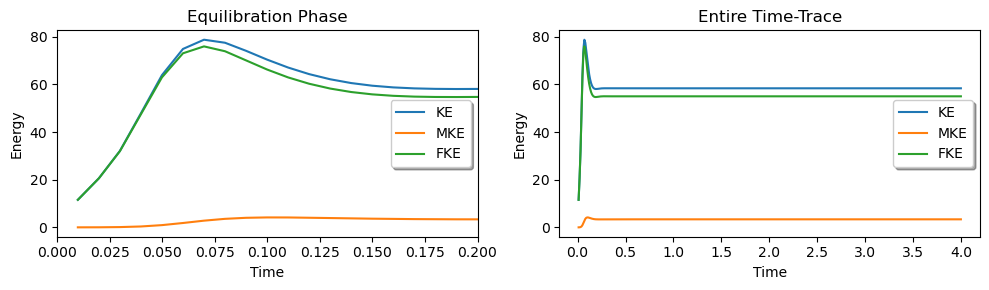

In [7]:
sizetuple=(10,3)
fig, ax = plt.subplots(ncols=2, figsize=sizetuple)
ax[0].plot(time, gavgs[:,ke], label='KE')
ax[0].plot(time, gavgs[:,mke],label='MKE')
ax[0].plot(time, gavgs[:,fke], label='FKE')
ax[0].legend(loc='center right', shadow=True)
ax[0].set_xlim([0,0.2])
ax[0].set_title('Equilibration Phase')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Energy')

ax[1].plot(time, gavgs[:,ke], label='KE')
ax[1].plot(time, gavgs[:,mke], label = 'MKE')
ax[1].plot(time,gavgs[:,fke],label='FKE')
ax[1].legend(loc='center right', shadow=True)
ax[1].set_title('Entire Time-Trace')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Energy')

saveplot = False # Plots appear in the notebook and are not written to disk (set to True to save to disk)
savefile = 'energy_trace.pdf'  #Change .pdf to .png if pdf conversion gives issues
plt.tight_layout()
plt.show()

We can also look at the energy associated with each velocity component.
Note that we log scale in the last plot.  There is very little mean radial or theta kinetic energy; it is mostly phi energy.

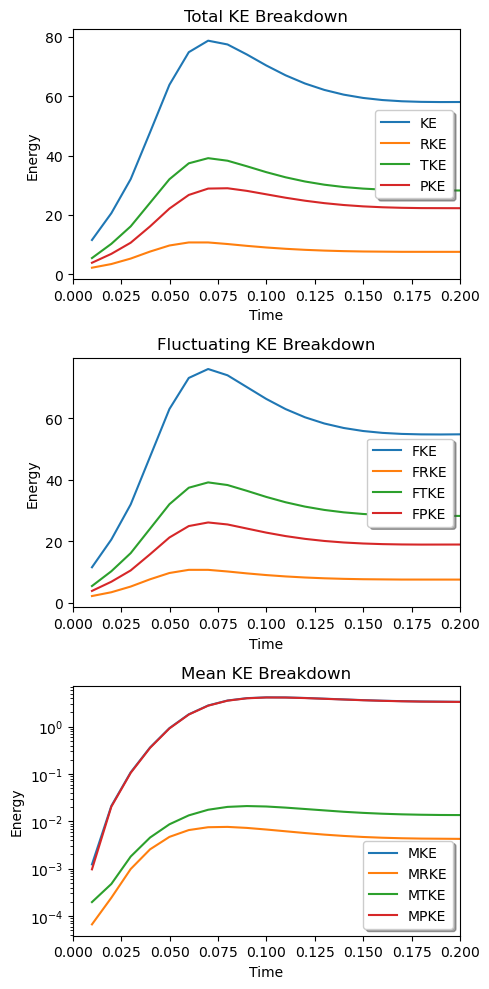

In [8]:
sizetuple=(5,10)
xlims=[0,0.2]
fig, ax = plt.subplots(ncols=1, nrows=3, figsize=sizetuple)
ax[0].plot(time, gavgs[:,ke], label='KE')
ax[0].plot(time, gavgs[:,rke],label='RKE')
ax[0].plot(time, gavgs[:,tke], label='TKE')
ax[0].plot(time, gavgs[:,pke], label='PKE')
ax[0].legend(loc='center right', shadow=True)
ax[0].set_xlim(xlims)
ax[0].set_title('Total KE Breakdown')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Energy')

ax[1].plot(time, gavgs[:,fke],  label='FKE')
ax[1].plot(time, gavgs[:,frke], label='FRKE')
ax[1].plot(time, gavgs[:,ftke], label='FTKE')
ax[1].plot(time, gavgs[:,fpke], label='FPKE')
ax[1].legend(loc='center right', shadow=True)
ax[1].set_xlim(xlims)
ax[1].set_title('Fluctuating KE Breakdown')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Energy')

ax[2].plot(time, gavgs[:,mke],  label='MKE')
ax[2].plot(time, gavgs[:,mrke], label='MRKE')
ax[2].plot(time, gavgs[:,mtke], label='MTKE')
ax[2].plot(time, gavgs[:,mpke], label='MPKE')
ax[2].legend(loc='lower right', shadow=True)
ax[2].set_xlim(xlims)
ax[2].set_title('Mean KE Breakdown')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Energy')
ax[2].set_yscale('log')

plt.tight_layout()
plt.show()

V.  Shell Averages
==========

**Summary:**   Spherical averages of requested output variables.  Each output variable is stored as a 1-D function of radius.

**Subdirectory:**  Shell_Avgs

**main_input prefix:** shellavg

**Python Class:** Shell_Avgs

**Additional Namelist Variables:**  
None

The Shell-Averaged outputs are useful for examining how quantities vary as a function of radius.  They are particularly useful for examining the distribution of energy as a function of radius, or the heat flux balance established by the system.

Examining the *main_input* file, we see that the following output values have been denoted for the Shell Averages (see *rayleigh_output_variables.pdf* for mathematical formulae):


| Menu Code  | Description |
|------------|-------------|
| 1          | Radial Velocity |
| 2          | Theta Velocity |
| 3          | Phi Velocity  |
| 501        | Temperature Perturbation |
| 1438       | Radial Convective Heat Flux|
| 1468       |Radial Conductive Heat Flux |


In the example that follows, we will plot the spherically-averaged velocity field as a function of radius, the mean temperature profile, and the radial heat flux.  We begin with a preamble similar to that used for the Global Averages.  Using the help function, we see that the Shell_Avgs data structure is similar to that of the G_Avgs.  There are three important differences:
*  There is a radius attribute (necessary if we want to plot anything vs. radius)
*  The dimensionality of the values array has changed;  radial index forms the first dimension.
*  The second dimension of the values array has a length of 4.  In addition to the spherical mean, the 1st, 2nd and 3rd moments are stored in indices 0,1,2, and 3 respectively.

In [9]:
from rayleigh_diagnostics import Shell_Avgs, build_file_list
import matplotlib.pyplot as plt
import numpy

# Build a list of all files ranging from iteration 0 million to 1 million
files = build_file_list(0,1000000,path='Shell_Avgs')
a = Shell_Avgs(filename=files[0], path='')
help(a)

Help on Shell_Avgs in module rayleigh_diagnostics object:

class Shell_Avgs(builtins.object)
 |  Shell_Avgs(filename='none', path='Shell_Avgs/', ntheta=0)
 |  
 |  Rayleigh Shell Average Structure
 |  ----------------------------------
 |  self.niter                         : number of time steps
 |  self.nq                            : number of diagnostic quantities output
 |  self.nr                            : number of radial points
 |  self.qv[0:nq-1]                    : quantity codes for the diagnostics output
 |  self.radius[0:nr-1]                : radial grid
 |  
 |  For version 1:
 |  self.vals[0:nr-1,0:nq-1,0:niter-1] : The spherically averaged diagnostics
 |                                           
 |  
 |  For version 2:
 |  self.vals[0:n-1,0:3,0:nq-1,0:niter-1] : The spherically averaged diagnostics
 |                                           0-3 refers to moments (index 0 is mean, index 3 is kurtosis)    
 |  self.iters[0:niter-1]              : The time step num


***

While it can be useful to look at instaneous snapshots of Shell Averages, it's often useful to examine these outputs in a time-averaged sense.    Let's average of all 200 snapshots in the last file that was output.  We could average over data from multiple files, but since the benchmark run achieves a nearly steady state, a single file will do in this case.

In [10]:
nfiles = len(files)

nr = a.nr
nq = a.nq
nmom = 4
niter = a.niter
radius = a.radius
savg=numpy.zeros((nr,nmom,nq),dtype='float64')
for i in range(niter):
    savg[:,:,:] += a.vals[:,:,:,i]
savg = savg*(1.0/niter)

lut = a.lut
vr = lut[1]        # Radial Velocity
vtheta = lut[2]    # Theta Velocity
vphi = lut[3]      # Phi Velocity
thermal = lut[501] # Temperature


eflux = lut[1440]  # Convective Heat Flux (radial)
cflux = lut[1470]  # Conductive Heat Flux (radial)

Velocity vs. Radius
---------------------
Next, we plot the mean velocity field, and its first moment, as a function of radius.   Notice that the radial and theta velocity components have a zero spherical mean.  Since we are running an incompressible model, this is a good sign!

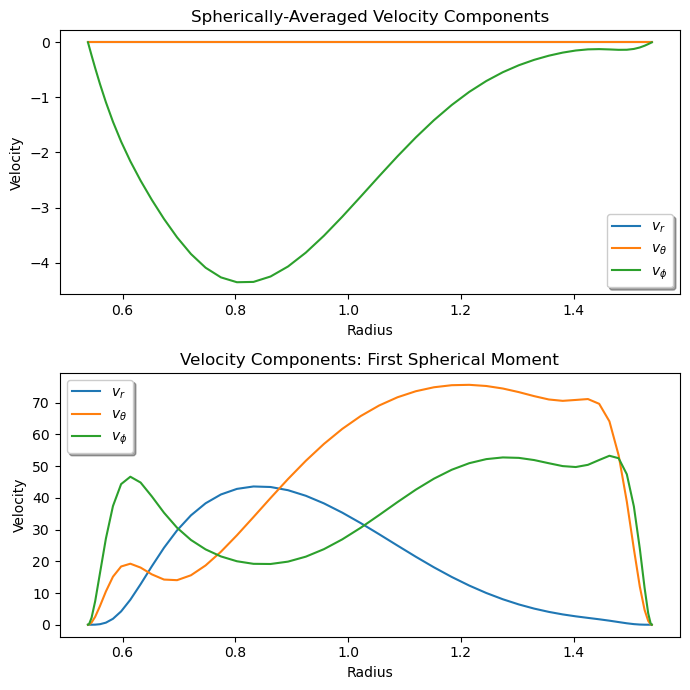

In [11]:
sizetuple = (7,7)
fig, ax = plt.subplots(nrows=2, ncols =1, figsize=sizetuple)

ax[0].plot(radius,savg[:,0,vr],label=r'$v_r$')
ax[0].plot(radius,savg[:,0,vtheta], label=r'$v_\theta$')
ax[0].plot(radius,savg[:,0,vphi], label=r'$v_\phi$')
ax[0].legend(shadow=True,loc='lower right')
ax[0].set_xlabel('Radius')
ax[0].set_ylabel('Velocity')
ax[0].set_title('Spherically-Averaged Velocity Components')

ax[1].plot(radius,savg[:,1,vr],label=r'$v_r$')
ax[1].plot(radius,savg[:,1,vtheta], label=r'$v_\theta$')
ax[1].plot(radius,savg[:,1,vphi], label=r'$v_\phi$')
ax[1].legend(shadow=True,loc='upper left')
ax[1].set_xlabel('Radius')
ax[1].set_ylabel('Velocity')
ax[1].set_title('Velocity Components: First Spherical Moment')


plt.tight_layout()
plt.show()

Radial Temperature Profile
------------------------------
We might also look at temperature ...

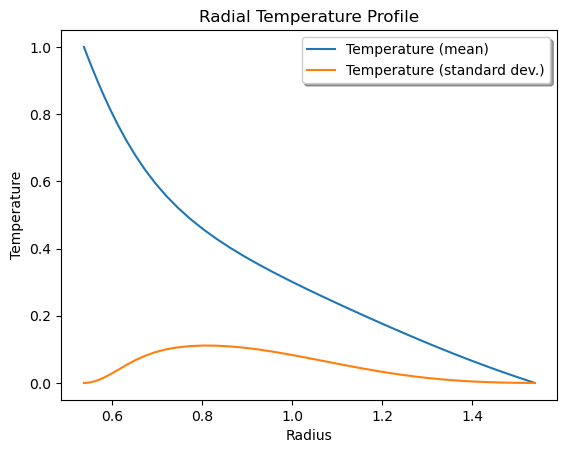

In [12]:
fig, ax = plt.subplots()

ax.plot(radius,savg[:,0,thermal],label='Temperature (mean)')
ax.plot(radius,savg[:,1,thermal]*10, label='Temperature (standard dev.)')
ax.legend(shadow=True,loc='upper right')
ax.set_xlabel('Radius')
ax.set_ylabel('Temperature')
ax.set_title('Radial Temperature Profile')


plt.show()

Heat Flux Contributions
--------------------------
We can also examine the balance between convective and conductive heat flux.  In this case, before plotting these quantities as a function of radius, we normalize them by the surface area of the sphere to form a luminosity.

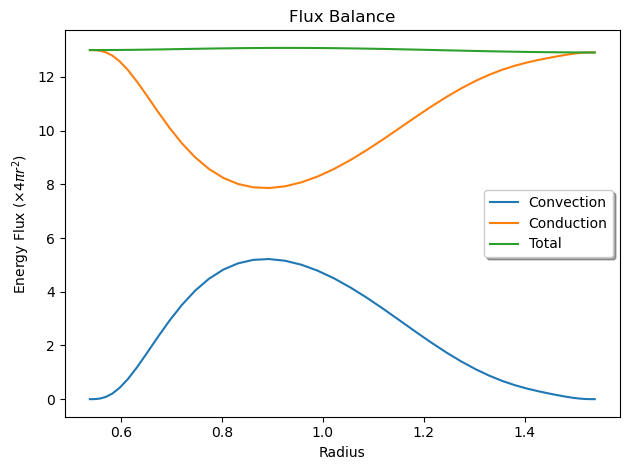

In [13]:
fpr=4.0*numpy.pi*radius*radius
elum = savg[:,0,eflux]*fpr
clum = savg[:,0,cflux]*fpr
tlum = elum+clum
fig, ax = plt.subplots()
ax.plot(radius,elum,label='Convection')
ax.plot(radius,clum, label='Conduction')
ax.plot(radius,tlum, label='Total')
ax.set_title('Flux Balance')
ax.set_ylabel(r'Energy Flux ($\times 4\pi r^2$)')
ax.set_xlabel('Radius')
ax.legend(shadow=True)
plt.tight_layout()
plt.show()

VI.  Azimuthal Averages
=============


**Summary:**    Azimuthal averages of requested output variables.  Each output variable is stored as a 2-D function of radius and latitude.

**Subdirectory:**  AZ_Avgs

**main_input prefix:** azavg

**Python Class:** AZ_Avgs

**Additional Namelist Variables:**  
None

Azimuthally-Averaged outputs are particularly useful for examining a system's mean flows (i.e., differential rotation and meridional circulation). 

Examining the *main_input* file, we see that the following output values have been denoted for the Azimuthal Averages (see *rayleigh_output_variables.pdf* for mathematical formulae):


| Menu Code  | Description |
|------------|-------------|
| 1          | Radial Velocity |
| 2          | Theta Velocity |
| 3          | Phi Velocity  |
| 201        | Radial Mass Flux |
| 202        | Theta Mass Flux |
| 501        | Temperature Perturbation |



In the example that follows, we demonstrate how to plot azimuthal averages, including how to generate streamlines of mass flux.   Note that since the benchmark is Boussinesq, our velocity and mass flux fields are identical.  This is not the case when running an anelastic simulation.

We begin with the usual preamble and also import two helper routines used for displaying azimuthal averages.

Examining the data structure, we see that the vals array is dimensioned to account for latitudinal variation, and that we have new attributes costheta and sintheta used for referencing locations in the theta direction.

In [14]:
from rayleigh_diagnostics import AZ_Avgs, build_file_list, plot_azav, streamfunction
import matplotlib.pyplot as plt
import pylab
import numpy
#from azavg_util import *
files = build_file_list(30000,40000,path='AZ_Avgs')
az = AZ_Avgs(files[0],path='')
help(az)

Help on AZ_Avgs in module rayleigh_diagnostics object:

class AZ_Avgs(builtins.object)
 |  AZ_Avgs(filename='none', path='AZ_Avgs/')
 |  
 |  Rayleigh AZ_Avgs Structure
 |  ----------------------------------
 |  self.niter                                    : number of time steps
 |  self.nq                                       : number of diagnostic quantities output
 |  self.nr                                       : number of radial points
 |  self.ntheta                                   : number of theta points
 |  self.qv[0:nq-1]                               : quantity codes for the diagnostics output
 |  self.radius[0:nr-1]                           : radial grid
 |  self.costheta[0:ntheta-1]                     : cos(theta grid)
 |  self.sintheta[0:ntheta-1]                     : sin(theta grid)
 |  self.vals[0:ntheta-1,0:nr-1,0:nq-1,0:niter-1] : The phi-averaged diagnostics 
 |  self.iters[0:niter-1]                         : The time step numbers stored in this output file


***
Before creating our plots, let's time-average over the last two files that were output (thus sampling the equilibrated phase).

In [15]:



nfiles = len(files)
tcount=0
for i in range(nfiles):
    az=AZ_Avgs(files[i],path='')

    if (i == 0):
        nr = az.nr
        ntheta = az.ntheta
        nq = az.nq
        azavg=numpy.zeros((ntheta,nr,nq),dtype='float64')

    for j in range(az.niter):
        azavg[:,:,:] += az.vals[:,:,:,j]
        tcount+=1
azavg = azavg*(1.0/tcount)  # Time steps were uniform for this run, so a simple average will suffice

lut = az.lut
vr = azavg[:,:,lut[1]]
vtheta = azavg[:,:,lut[2]]
vphi = azavg[:,:,lut[3]]
rhovr = azavg[:,:,lut[201]]
rhovtheta = azavg[:,:,lut[202]]
temperature = azavg[:,:,lut[501]]
radius = az.radius
costheta = az.costheta
sintheta = az.sintheta

Before we render, we need to do some quick post-processing:
1. Remove the spherical mean temperature from the azimuthal average.
2. Convert v_phi into omega
3. Compute the magnitude of the mass flux vector
4. Compute stream function associated with the mass flux field

In [16]:
#Subtrace the ell=0 component from temperature at each radius
for i in range(nr):
    temperature[:,i]=temperature[:,i] - numpy.mean(temperature[:,i])

#Convert v_phi to an Angular velocity
omega=numpy.zeros((ntheta,nr))
for i in range(nr):
    omega[:,i]=vphi[:,i]/(radius[i]*sintheta[:])

#Generate a streamfunction from rhov_r and rhov_theta
psi = streamfunction(rhovr,rhovtheta,radius,costheta,order=0)
#contours of mass flux are overplotted on the streamfunction PSI
rhovm = numpy.sqrt(rhovr**2+rhovtheta**2)*numpy.sign(psi)    

Finally, we render the azimuthal averages.  
**NOTE:**  If you want to save any of these figures, you can mimic the saveplot logic at the bottom of this example.

/home/vboxuser/Desktop/runs/case1/rayleigh_diagnostics.py:2460: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  img = ax.pcolormesh(yr,xr,field,cmap=mycmap,shading='auto')
/home/vboxuser/Desktop/runs/case1/rayleigh_diagnostics.py:2460: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  img = ax.pcolormesh(yr,xr,field,cmap=mycmap,shading='auto')
/home/vboxuser/Desktop/runs/case1/rayleigh_diagnostics.py:2462: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges

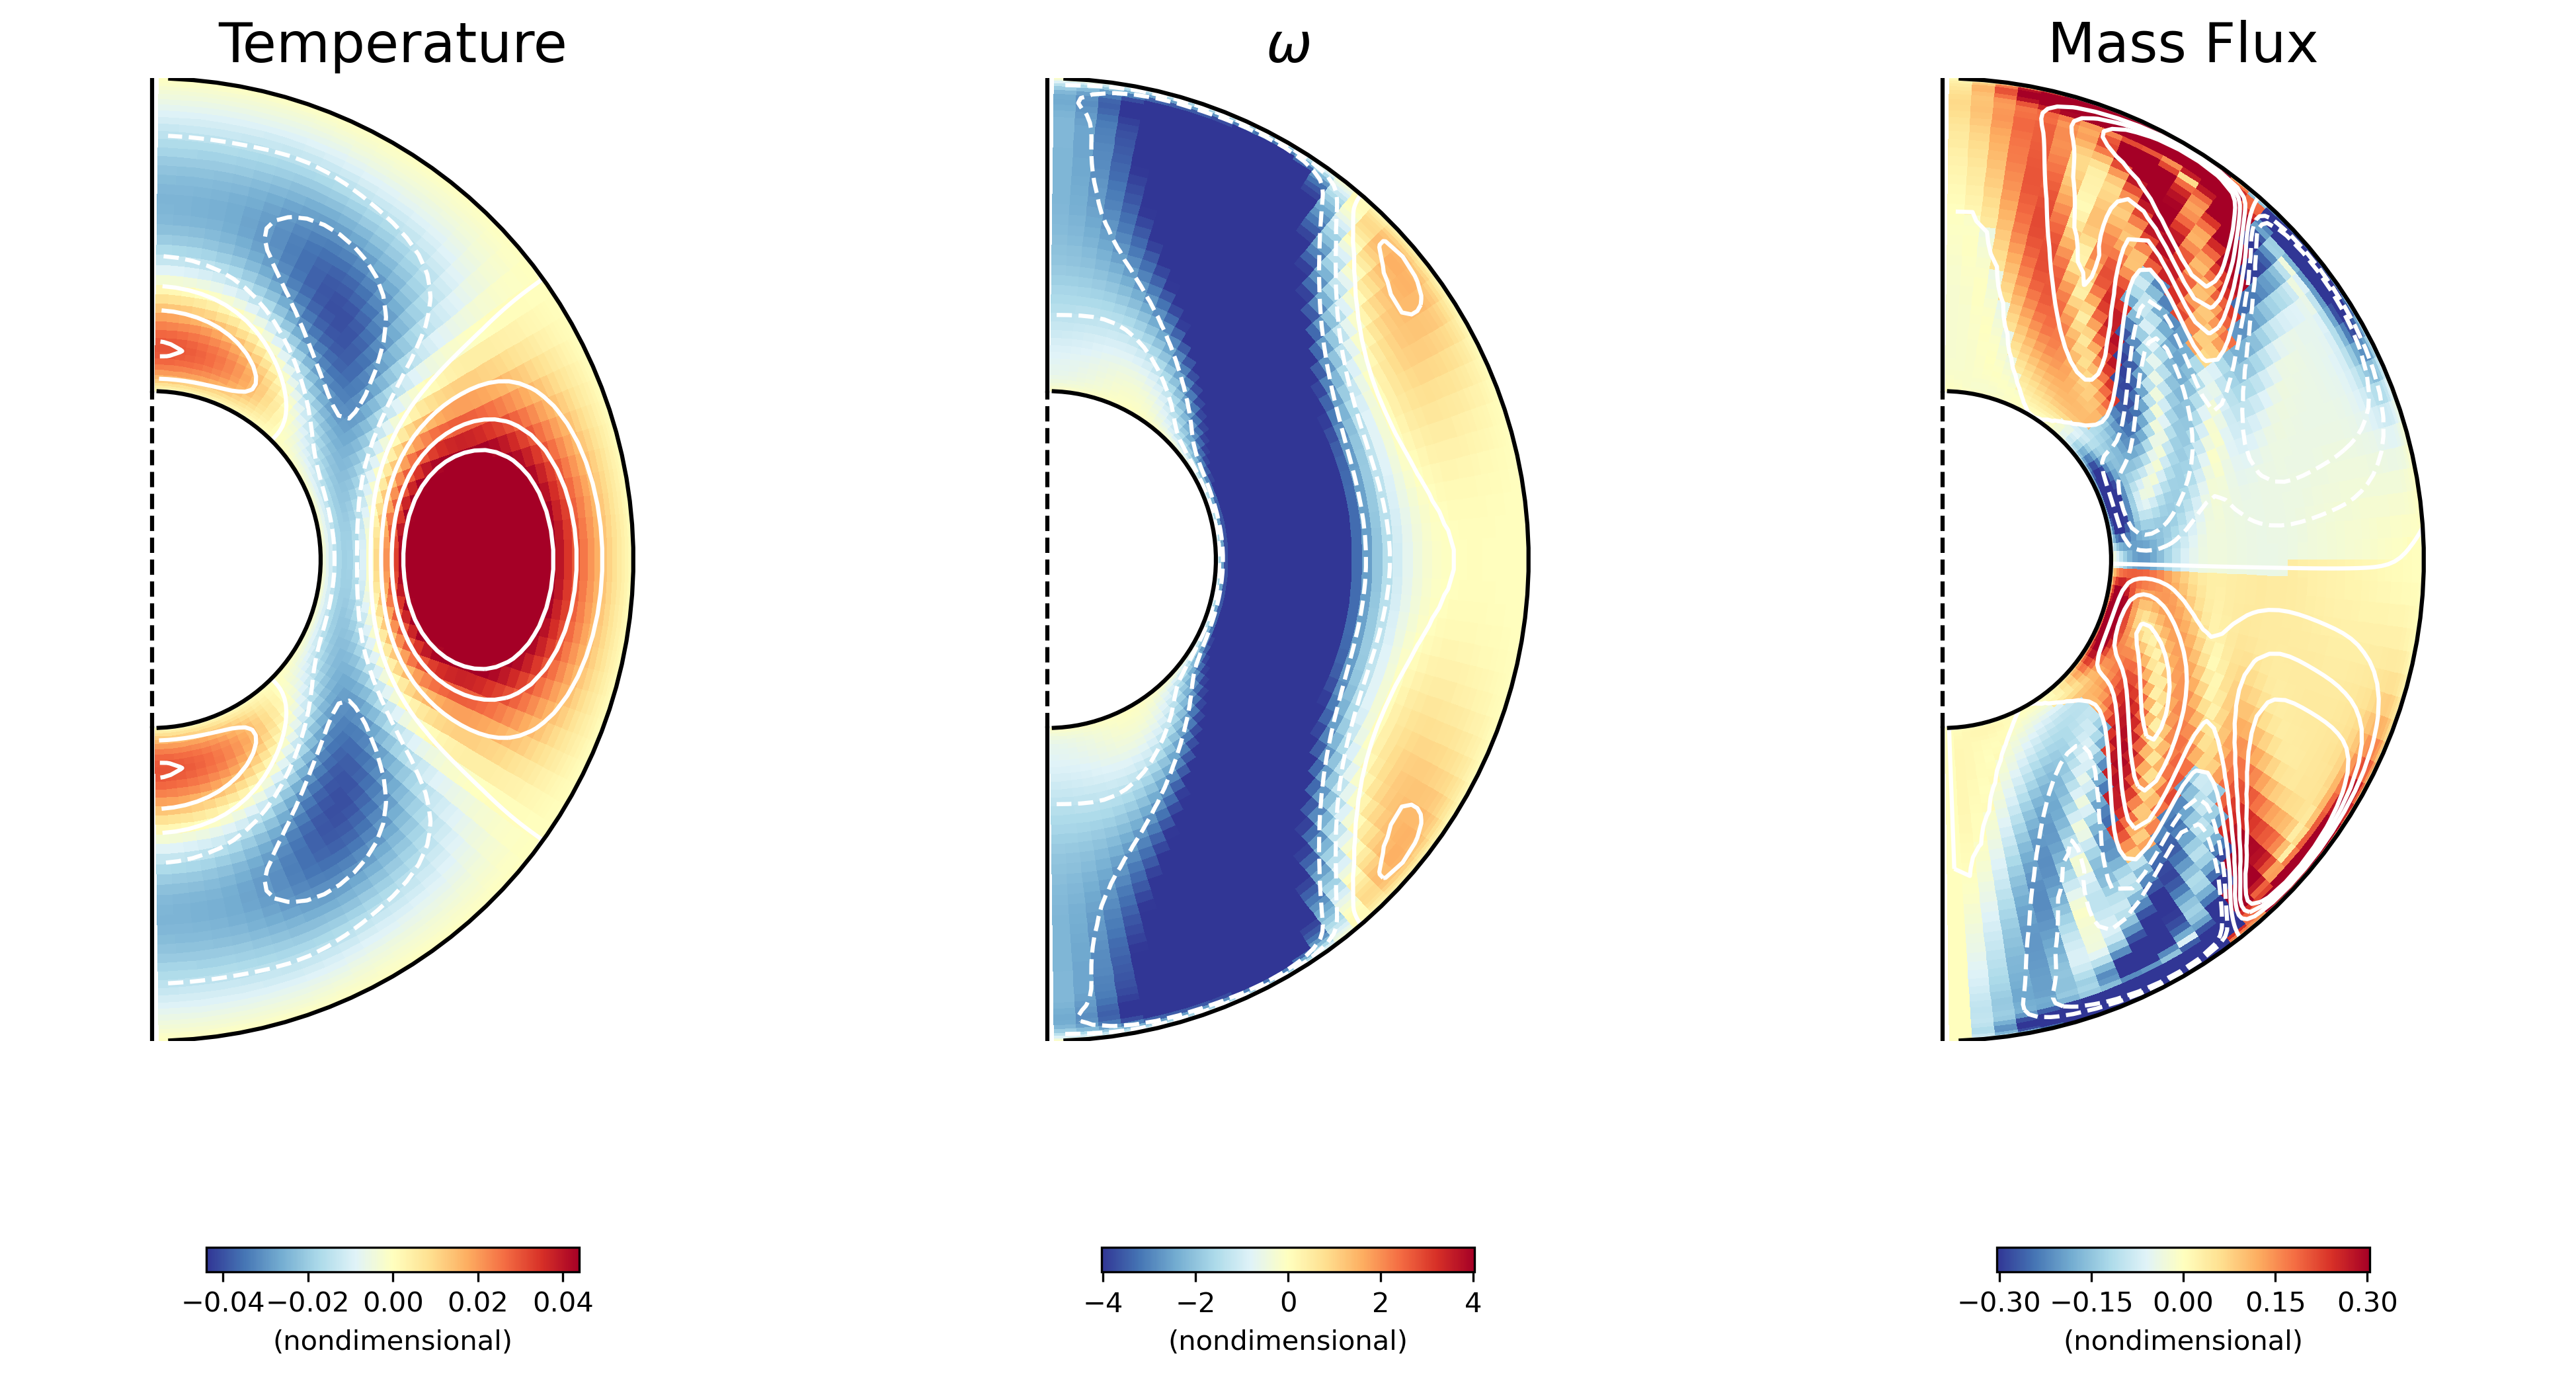

In [17]:
#   We do a single row of 3 images 
#   Spacing is default spacing set up by subplot
figdpi=300
sizetuple=(5.5*3,3*3)


tsize = 20     # title font size
cbfsize = 10   # colorbar font size
fig, ax = plt.subplots(ncols=3,figsize=sizetuple,dpi=figdpi)
plt.rcParams.update({'font.size': 14})

#temperature
#ax1 = f1.add_subplot(1,3,1)
units = '(nondimensional)'
plot_azav(fig,ax[0],temperature,radius,costheta,sintheta,mycmap='RdYlBu_r',boundsfactor = 2, 
          boundstype='rms', units=units, fontsize = cbfsize)
ax[0].set_title('Temperature',fontsize=tsize)

#Differential Rotation
#ax1 = f1.add_subplot(1,3,2)
units = '(nondimensional)'
plot_azav(fig,ax[1],omega,radius,costheta,sintheta,mycmap='RdYlBu_r',boundsfactor = 1.5, 
          boundstype='rms', units=units, fontsize = cbfsize)
ax[1].set_title(r'$\omega$',fontsize=tsize)

#Mass Flux
#ax1 = f1.add_subplot(1,3,3)
units = '(nondimensional)'
plot_azav(fig,ax[2],psi,radius,costheta,sintheta,mycmap='RdYlBu_r',boundsfactor = 1.5, 
          boundstype='rms', units=units, fontsize = cbfsize, underlay = rhovm)
ax[2].set_title('Mass Flux',fontsize = tsize)

saveplot=False
if (saveplot):
    p.savefig(savefile)  
else:
    plt.show()


VII.  Simulation Slices 
============

VII.1  Equatorial Slices
--------------------------

**Summary:**    2-D profiles of selected output variables in the equatorial plane. 

**Subdirectory:**  Equatorial_Slices

**main_input prefix:** equatorial

**Python Class:** Equatorial_Slices

**Additional Namelist Variables:**  
None

The equatorial-slice output type allows us to examine how the fluid properties vary in longitude and radius.

Examining the *main_input* file, we see that the following output values have been denoted for the Equatorial Slices (see *rayleigh_output_variables.pdf* for mathematical formulae):


| Menu Code  | Description |
|------------|-------------|
| 1          | Radial Velocity |
| 2          | Theta Velocity |
| 3          | Phi Velocity  |




In the example that follows, we demonstrate how to create a 2-D plot of radial velocity in the equatorial plane (at a single time step).

We begin with the usual preamble.  Examining the data structure, we see that the *vals* array is dimensioned to account for longitudinal variation, and that we have the new coordinate attribute *phi*.

In [18]:
from rayleigh_diagnostics import Equatorial_Slices
import numpy
import matplotlib.pyplot as plt
from matplotlib import ticker, font_manager
istring = '00040000'
es = Equatorial_Slices(istring)
tindex =1 # Grab second time index from this file
help(es)

Help on Equatorial_Slices in module rayleigh_diagnostics object:

class Equatorial_Slices(builtins.object)
 |  Equatorial_Slices(filename='none', path='Equatorial_Slices/')
 |  
 |  Rayleigh Equatorial Slice Structure
 |  ----------------------------------
 |  self.niter                                    : number of time steps
 |  self.nq                                       : number of diagnostic quantities output
 |  self.nr                                       : number of radial points
 |  self.nphi                                     : number of phi points
 |  self.qv[0:nq-1]                               : quantity codes for the diagnostics output
 |  self.radius[0:nr-1]                           : radial grid
 |  self.vals[0:phi-1,0:nr-1,0:nq-1,0:niter-1]    : The equatorial_slices
 |  self.phi[0:nphi-1]                            : phi values (in radians)
 |  self.iters[0:niter-1]                         : The time step numbers stored in this output file
 |  self.time[0:niter

/tmp/ipykernel_28677/794050368.py:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = ax.pcolormesh(X,Y,field,cmap='jet')


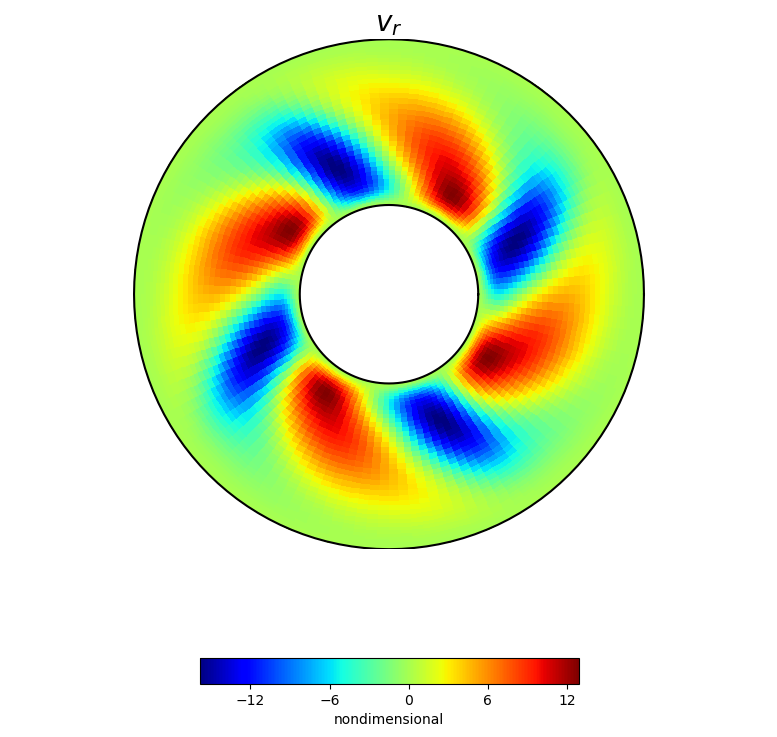

In [19]:
################################
# Equatorial Slice 
#Set up the grid

remove_mean = True # Remove the m=0 mean
nr = es.nr
nphi = es.nphi
r = es.radius/numpy.max(es.radius)
phi = numpy.zeros(nphi+1,dtype='float64')
phi[0:nphi] = es.phi
phi[nphi] = numpy.pi*2  # For display purposes, it is best to have a redunant data point at 0,2pi

#We need to generate a cartesian grid of x-y coordinates (both X & Y are 2-D)
radius_matrix, phi_matrix = numpy.meshgrid(r,phi)
X = radius_matrix * numpy.cos(phi_matrix)
Y = radius_matrix * numpy.sin(phi_matrix)

qindex = es.lut[1] # radial velocity
field = numpy.zeros((nphi+1,nr),dtype='float64')
field[0:nphi,:] =es.vals[:,:,qindex,tindex]
field[nphi,:] = field[0,:]  #replicate phi=0 values at phi=2pi

#remove the mean if desired (usually a good idea, but not always)
if (remove_mean):
    for i in range(nr):
        the_mean = numpy.mean(field[:,i])
        field[:,i] = field[:,i]-the_mean

#Plot
sizetuple=(8,5)
fig, ax = plt.subplots(figsize=(8,8))
tsize = 20     # title font size
cbfsize = 10   # colorbar font size
img = ax.pcolormesh(X,Y,field,cmap='jet')
ax.axis('equal')  # Ensure that x & y axis ranges have a 1:1 aspect ratio
ax.axis('off')    # Do not plot x & y axes

# Plot bounding circles
ax.plot(r[nr-1]*numpy.cos(phi), r[nr-1]*numpy.sin(phi), color='black')  # Inner circle
ax.plot(r[0]*numpy.cos(phi), r[0]*numpy.sin(phi), color='black')  # Outer circle

ax.set_title(r'$v_r$', fontsize=20)

#colorbar ...
cbar = plt.colorbar(img,orientation='horizontal', shrink=0.5, aspect = 15, ax=ax)
cbar.set_label('nondimensional')
        
tick_locator = ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()
cbar.ax.tick_params(labelsize=cbfsize)   #font size for the ticks

t = cbar.ax.xaxis.label
t.set_fontsize(cbfsize)  # font size for the axis title


plt.tight_layout()
plt.show()

VII.2  Meridional Slices
--------------------------

**Summary:**    2-D profiles of selected output variables sampled in meridional planes. 

**Subdirectory:**  Meridional_Slices

**main_input prefix:** meridional

**Python Class:** Meridional_Slices

**Additional Namelist Variables:**  

* meridional_indices (indicial) : indices along longitudinal grid at which to output meridional planes.

* meridional_indices_nrm (normalized) : normalized longitudinal grid coordinates at which to output


The meridional-slice output type allows us to examine how the fluid properties vary in latitude and radius.

Examining the *main_input* file, we see that the following output values have been denoted for the Meridional Slices (see *rayleigh_output_variables.pdf* for mathematical formulae):


| Menu Code  | Description |
|------------|-------------|
| 1          | Radial Velocity |
| 2          | Theta Velocity |
| 3          | Phi Velocity  |




In the example that follows, we demonstrate how to create a 2-D plot of radial velocity in a meridional plane.  The procedure is similar to that used to plot an azimuthal average.


We begin with the usual preamble and import the *plot_azav* helper function.  Examining the data structure, we see that it is similar to the AZ_Avgs data structure.  The *vals* array possesses an extra dimension relative to its AZ_Avgs counterpart to account for the multiple longitudes that may be output, we see attributes *phi* and *phi_indices* have been added to reference the longitudinal grid.  

In [20]:
#####################################
#  Meridional Slice
from rayleigh_diagnostics import Meridional_Slices, plot_azav
import numpy
import matplotlib.pyplot as plt
from matplotlib import ticker, font_manager
# Read the data

istring = '00040000'
ms = Meridional_Slices(istring)
tindex =1 # All example quantities were output with same cadence.  Grab second time-index from all.
help(ms)

Help on Meridional_Slices in module rayleigh_diagnostics object:

class Meridional_Slices(builtins.object)
 |  Meridional_Slices(filename='none', path='Meridional_Slices/')
 |  
 |  Rayleigh Meridional Slice Structure
 |  ----------------------------------
 |  self.niter                                    : number of time steps
 |  self.nq                                       : number of diagnostic quantities output
 |  self.nr                                       : number of radial points
 |  self.ntheta                                   : number of theta points
 |  self.nphi                                     : number of phi points sampled
 |  self.qv[0:nq-1]                               : quantity codes for the diagnostics output
 |  self.radius[0:nr-1]                           : radial grid
 |  self.costheta[0:ntheta-1]                     : cos(theta grid)
 |  self.sintheta[0:ntheta-1]                     : sin(theta grid)
 |  self.phi[0:nphi-1]                            : p

/home/vboxuser/Desktop/runs/case1/rayleigh_diagnostics.py:2460: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  img = ax.pcolormesh(yr,xr,field,cmap=mycmap,shading='auto')


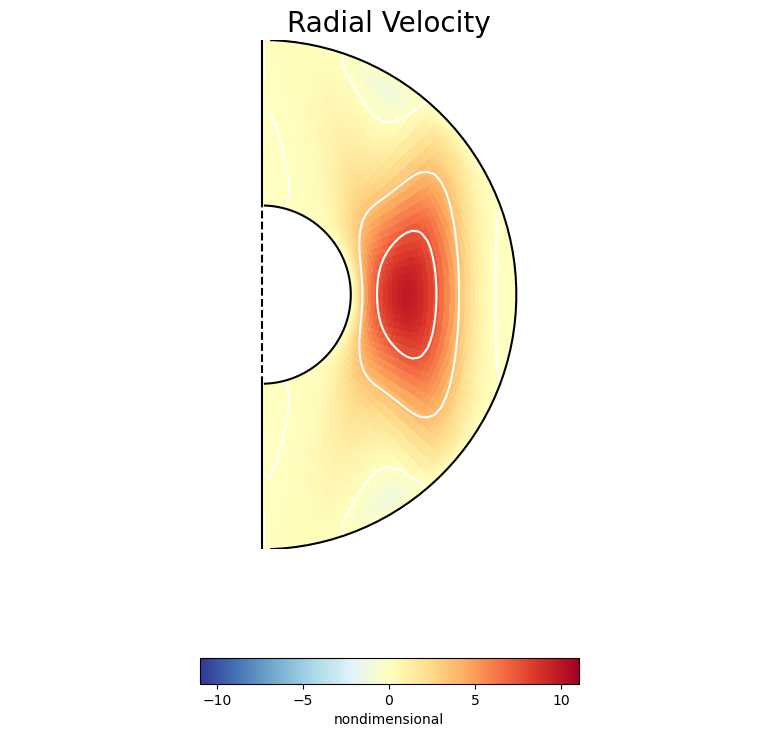

In [21]:

radius = ms.radius
costheta = ms.costheta
sintheta = ms.sintheta
phi_index = 0  # We only output one Meridional Slice
vr_ms = ms.vals[phi_index,:,:,ms.lut[1],tindex]
units = 'nondimensional'

# Plot
sizetuple=(8,5)
fig, ax = plt.subplots(figsize=(8,8))
tsize = 20     # title font size
cbfsize = 10   # colorbar font size
ax.axis('equal')  # Ensure that x & y axis ranges have a 1:1 aspect ratio
ax.axis('off')    # Do not plot x & y axes
plot_azav(fig,ax,vr_ms,radius,costheta,sintheta,mycmap='RdYlBu_r',boundsfactor = 4.5, 
          boundstype='rms', units=units, fontsize = cbfsize)
ax.set_title('Radial Velocity',fontsize=tsize)
plt.tight_layout()
plt.show()

VII.3  Shell Slices
--------------------------

**Summary:**    2-D, spherical profiles of selected output variables sampled in at discrete radii. 

**Subdirectory:**  Shell_Slices

**main_input prefix:** shellslice

**Python Class:** Shell_Slices

**Additional Namelist Variables:**  

* shellslice_levels (indicial) : indices along radial grid at which to output spherical surfaces.

* shellslice_levels_nrm (normalized) : normalized radial grid coordinates at which to output spherical surfaces.


The shell-slice output type allows us to examine how the fluid properties vary on spherical surfaces.

Examining the *main_input* file, we see that the following output values have been denoted for the Shell Slices (see *rayleigh_output_variables.pdf* for mathematical formulae):


| Menu Code  | Description |
|------------|-------------|
| 1          | Radial Velocity |
| 2          | Theta Velocity |
| 3          | Phi Velocity  |




In the example that follows, we demonstrate how to create a 2-D plot of the radial velocity on a Cartesian, lat-lon grid.

Plotting on a lat-lon grid is straightforward and illustrated below.   The shell-slice data structure is also displayed via the help() function in the example below and contains information needed to define the spherical grid for plotting purposes.

Help on Shell_Slices in module rayleigh_diagnostics object:

class Shell_Slices(builtins.object)
 |  Shell_Slices(filename='none', path='Shell_Slices/', slice_spec=[], rec0=False)
 |  
 |  Rayleigh Shell Slice Structure
 |  ----------------------------------
 |  self.niter                                    : number of time steps
 |  self.nq                                       : number of diagnostic quantities output
 |  self.nr                                       : number of shell slices output
 |  self.ntheta                                   : number of theta points
 |  self.nphi                                     : number of phi points
 |  self.qv[0:nq-1]                               : quantity codes for the diagnostics output
 |  self.radius[0:nr-1]                           : radii of the shell slices output
 |  self.rad_inds[0:nr-1]                         : radial indices of the shell slices output (from the full simulation radial grid) 
 |                                

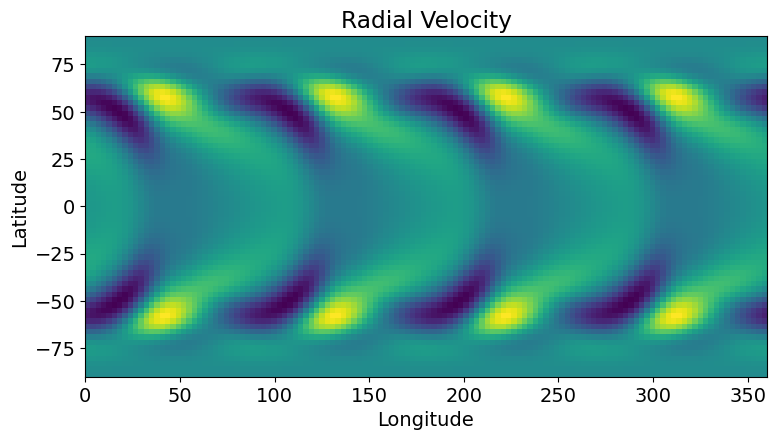

In [22]:
#####################################
#  Shell Slice
from rayleigh_diagnostics import Shell_Slices
import numpy
import matplotlib.pyplot as plt
from matplotlib import ticker, font_manager
# Read the data

istring = '00040000'
ss = Shell_Slices(istring)
help(ss)
ntheta = ss.ntheta
nphi = ss.nphi
costheta = ss.costheta
theta = numpy.arccos(costheta)

#help(ss)
tindex =1 # All example quantities were output with same cadence.  Grab second time-index from all.
rindex = 0 # only output one radius
sizetuple=(8,8)

vr = ss.vals[:,:,rindex,ss.lut[1],tindex]
fig, ax = plt.subplots(figsize=sizetuple)


img = plt.imshow(numpy.transpose(vr), extent=[0,360,-90,90])
ax.set_xlabel( 'Longitude')
ax.set_ylabel( 'Latitude')
ax.set_title(  'Radial Velocity')

plt.tight_layout()
plt.show()

By running the cell below, we can  plot different output quantities on a spherical surface.
In the example shown here, we plot all three velocity components ($u_r$, $u_{\theta}$ and $u_{\phi}$)
projected onto a spherical surface. For demonstration purposes, we illustrate each velocity component using different colormaps, at different latitudinal centers of vantage point etc. (for more details see comments within cell below as well as the Jupyter notebook titled "plot_shells.ipynb").

Note that in order to successfully run the cell below, you also need to have the orthographic projection code "projection.py" within the same directory/folder as this notebook.

In [23]:
import numpy
import matplotlib.pyplot as plt
from matplotlib import gridspec
from rayleigh_diagnostics import Shell_Slices
from projection import plot_ortho

# This plots various data from a single shell_slice file.
# 3 diferent plots in 1 row and 3 columns are created.
# It's easy to hack this to work with multiple files

s1=Shell_Slices('00040000')
data = numpy.zeros((s1.nphi,s1.ntheta),dtype='float64')
costheta = s1.costheta
nrows=2
ncols=2
pltin = 9  # Size of each subimage in inches (will be square)


# number of rows and columns
nrow=1
ncol=3

#We use gridspec to set up a grid.  We actually have nrow*2 rows, with every other
#row being a 'spacer' row that's 10% the height of the main rows.
#This was the simplest way I could come up with the have the color bars appear nicely.
fig = plt.figure(constrained_layout=False, figsize=(pltin*ncol,pltin*nrow*1.1))
spec = gridspec.GridSpec(ncols=ncol, nrows=nrow*2, figure=fig, height_ratios=[1,.1]*nrow, width_ratios=[1]*ncol)



plt.rcParams.update({'font.size': 16})
#quantities codes to plot -- here all three velocity components
qi =  [1,2, 3]
nm = [r'u$_r$', r'u$_\theta$', r'u$_\phi$']

qinds = [qi, qi]  # Quantity codes to plot
names = [nm, nm]  # Names for labeling

lv = [[1]*ncol , [2]*ncol]  # Shell levels to plot (top row is level 1, bottom row is level 2)


style1=['-','--',':']
style2=['-', '-', '-']
styles = [style1, style2]  # Line style of grid lines

gwidth1=[0.5 , 1 , 1.5] 
gwidth2=[1,1,1]
gwidths = [gwidth1, gwidth2] # width of grid lines for each image (Default: True)

hwidths1=[2.5,2.5,2.5]  # Width of the horizon line or each image (Default: 2)
hwidths2=[2,2,2]
hwidths=[hwidths1,hwidths2]

cmaps1 = ["RdYlBu_r", "seismic", 'PiYG']  # A color table for each image (Default: RdYlBu_r)
cmaps2 = ["RdYlBu_r"]*4
cmaps = [cmaps1, cmaps1]

pgrids1 = [True, True, True] 
pgrids2 = [True, True, True]
pgrids  = [pgrids1, pgrids2] # Plot grids, or not for each image (Default: True)

latcens1 = [60, 45, 15]
latcens = [latcens1, latcens1]   # Latitudinal center of vantage point (Default: 45 N)

loncens1 = [0,0,0]
loncens2 = [30,30,30]  # Longitudinal center of vantage point (Default: 0)
loncens = [loncens1,loncens2]

##########################################################
# If the grid is plotted, the number of latitude lines
# for the grid can be controlled via the nlats keyword.
# Default: 9
# Note that if nlats is even, the equator will not be drawn
nlats1 = [3,5,7]
nlats2 = [4,6,8]
nlats = [nlats1, nlats1]

##############################################################################
# Similarly, the nlons keyword can be used to control longitude lines
# More precisely, it controls the number of MERIDIANS (great circles) drawn
# Default:  8
nlons1 = [4,8,12]
nlons2 = [4,12,16]
nlons = [nlons1,nlons1]

#Longitude grid-lines can be drawn in one of two ways:
# 1)  Completely to the pole (polar_style = 'polar')
# 2)  Truncated at the last line of latitue drawn (polar_style = 'truncated')
# Default:  "truncated"
pstyle1 = ['truncated', 'polar', 'truncated']
pstyle = [pstyle1, pstyle1]


##############################################################
# We can also control the way in which the image is saturated
# via the scale_type keyword.   There are three possibilities:
# 1) scale_type=['rms', a], where a is of type 'float'
#    In this instance, the image bounds are -a*rms(data), +a*rms(data)
# 2) scale_type = ['abs', a]
#    In this instance, the image bounds are -a*abs(data), +a*abs(data)
# 3) scale_type= ['force', [a,b]]
#    In this instance, the image bounds are a,b
# 4) scale_type = [None,None]
#    In this instance, the image bounds are min(image), max(image)
# Default:  [None,None]
# Note that rms and abs are taken over projected image values, not input data
# (you only see half the data in the image)

scale_type1 = [['rms',2.0 ], [None,None], ['abs', 0.5]]
scale_type2 = [['force', [-1500,1500]], ['force',[-10000,10000]], ['rms',2.5]]
scale_types = [scale_type1, scale_type1]

# Number of pixels across each projected, interpolated image
# 768 is the default and seems to do a reasonable job
nyzi = 768



for j in range(ncol):
    for i in range(nrow):
        
        data[:,:] = s1.vals[:,:,lv[i][j],s1.lut[qinds[i][j]],0]    

        row_ind = 2*i # skip over space allowed for color bars
        col_ind = j

        print("ROW/COL: ", row_ind, col_ind)
        ax    = fig.add_subplot(spec[row_ind,col_ind])
        cspec = spec[row_ind+1,col_ind]
        caxis=None

        plot_ortho(data,s1.costheta,fig,ax,caxis, hwidth=hwidths[i][j], gridstyle=styles[i][j], 
                   gridwidth=gwidths[i][j], nyz=nyzi, colormap=cmaps[i][j], 
                   plot_grid=pgrids[i][j], latcen=latcens[i][j], loncen= loncens[i][j],
                   pole_style=pstyle[i][j], nlats = nlats[i][j],scale_type=scale_types[i][j])
        ptitle=names[i][j]+"   (r_index = "+str(lv[i][j])+")"
        ax.set_title(ptitle)


# You can save the plot as a figure
#plt.savefig('flows.pdf')

ModuleNotFoundError: No module named 'projection'

VIII.  Spherical Harmonic Spectra
===================

**Summary:**    Spherical Harmonic Spectra sampled at discrete radii. 

**Subdirectory:**  Shell_Spectra

**main_input prefix:** shellspectra

**Python Classes:** 

* Shell_Spectra :  Complete data structure associated with Shell_Spectra outputs.
* PowerSpectrum :  Reduced data structure -- contains power spectrum of velocity and/or magnetic fields only.

**Additional Namelist Variables:**  

* shellspectra_levels (indicial) : indices along radial grid at which to output spectra.

* shellspectra_levels_nrm (normalized) : normalized radial grid coordinates at which to output spectra.


The shell-spectra output type allows us to examine the spherical harmonic decomposition of output variables at discrete radii.

Examining the *main_input* file, we see that the following output values have been denoted for the Shell Spectra (see *rayleigh_output_variables.pdf* for mathematical formulae):


| Menu Code  | Description |
|------------|-------------|
| 1          | Radial Velocity |
| 2          | Theta Velocity |
| 3          | Phi Velocity  |



Spherical harmonic spectra can be read into Python using either the **Shell_Spectra** or **PowerSpectrum** classes.  

The **Shell_Spectra** class provides the full complex spectra, as a function of degree ell and azimuthal order m, for each specified output variable.   It possesses an attribute named *lpower* that contains the associated power for each variable, along with its m=0 contributions separated and removed.

The **Power_Spectrum** class can be used to read a Shell_Spectra file and quickly generate a velocity or magnetic-field power spectrum.   For this class to work correctly, your file must contain all three components of either the velocity or magnetic field.   Other variables are ignored (use Shell_Spectrum's lpower for those).

We illustrate how to use these two classes below.  As usual, we call the help() function to display the docstrings that describe the different data structures embodied by each class.

Help on Power_Spectrum in module rayleigh_diagnostics object:

class Power_Spectrum(builtins.object)
 |  Power_Spectrum(infile, dims=[], power_file=False, magnetic=False, path='Shell_Spectra')
 |  
 |  Rayleigh Power Spectrum Structure
 |  ----------------------------------
 |  self.niter                                    : number of time steps
 |  self.nr                                       : number of radii at which power spectra are available
 |  self.lmax                                     : maximum spherical harmonic degree l
 |  self.radius[0:nr-1]                           : radii of the shell slices output
 |  self.rad_inds[0:nr-1]                         : radial indices of the shell slices output (from the full simulation radial grid) 
 |                                                : corresponding to each point in self.radius
 |  self.inds                                     : same as self.rad_inds (for backwards compatibility)
 |  self.power[0:lmax,0:nr-1,0:niter-1,0:

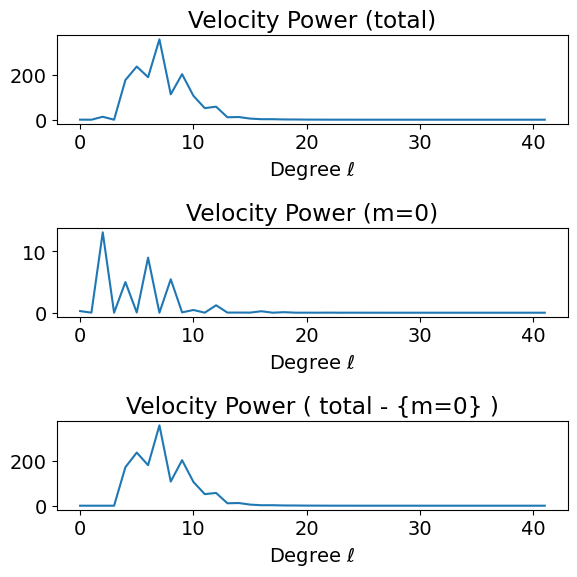

Help on Shell_Spectra in module rayleigh_diagnostics object:

class Shell_Spectra(builtins.object)
 |  Shell_Spectra(filename='none', path='Shell_Spectra/')
 |  
 |  Rayleigh Shell Spectrum Structure
 |  ----------------------------------
 |  self.niter                                    : number of time steps
 |  self.nq                                       : number of diagnostic quantities output
 |  self.nr                                       : number of shell slices output
 |  self.nell                                     : number of ell values
 |  self.nm                                       : number of m values
 |  self.lmax                                     : maximum spherical harmonic degree l
 |  self.mmax                                     : maximum spherical harmonic degree m
 |  self.qv[0:nq-1]                               : quantity codes for the diagnostics output
 |  self.radius[0:nr-1]                           : radii of the shell slices output
 |  self.rad_ind

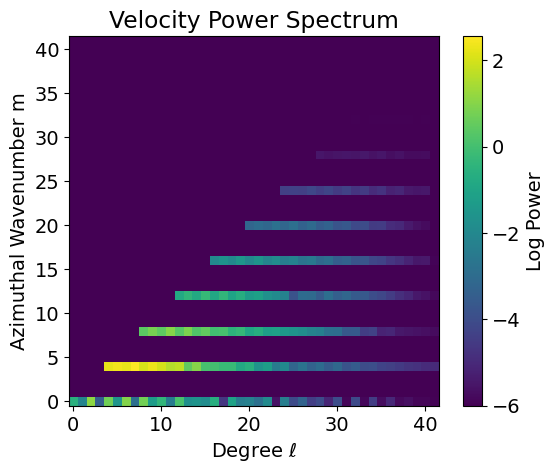

In [24]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy
from rayleigh_diagnostics import Shell_Spectra, Power_Spectrum
istring = '00040000'


tind = 0
rind = 0
#help(ss)

vpower = Power_Spectrum(istring)
help(vpower)
power = vpower.power

fig, ax = plt.subplots(nrows=3, figsize=(6,6))
ax[0].plot(power[:,rind,tind,0])
ax[0].set_xlabel(r'Degree $\ell$')
ax[0].set_title('Velocity Power (total)')


ax[1].plot(power[:,rind,tind,1])
ax[1].set_xlabel(r'Degree $\ell$')
ax[1].set_title('Velocity Power (m=0)')

ax[2].plot(power[:,rind,tind,2])
ax[2].set_xlabel(r'Degree $\ell$')
ax[2].set_title('Velocity Power ( total - {m=0} )')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots()
ss = Shell_Spectra(istring)
help(ss)
mmax = ss.mmax
lmax = ss.lmax
power_spectrum = numpy.zeros((lmax+1,mmax+1),dtype='float64')

for i in range(1,4):   # i takes on values 1,2,3
    qind=ss.lut[i]
    complex_spectrum = ss.vals[:,:,rind,qind,tind]
    power_spectrum = power_spectrum+numpy.real(complex_spectrum)**2 + numpy.imag(complex_spectrum)**2

power_spectrum = numpy.transpose(power_spectrum)

tiny = 1e-6
img=ax.imshow(numpy.log10(power_spectrum+tiny), origin='lower')
ax.set_ylabel('Azimuthal Wavenumber m')
ax.set_xlabel(r'Degree $\ell$')
ax.set_title('Velocity Power Spectrum')

#colorbar ...
cbar = plt.colorbar(img) # ,shrink=0.5, aspect = 15)
cbar.set_label('Log Power')
        
tick_locator = ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()
cbar.ax.tick_params()   #font size for the ticks


plt.show()



IX.  Point Probes
============

**Summary:**    Point-wise sampling of desired output variables.

**Subdirectory:**  Point_Probes

**main_input prefix:** point_probe

**Python Class:**  Point_Probes 


**Additional Namelist Variables:**  

* point_probe_r  : radial indices for point-probe output

* point_probe_theta  : theta indices for point-probe output

* point_probe_phi : phi indices for point-probe output

* point_probe_r_nrm  : normalized radial coordinates for point-probe output

* point_probe_theta_nrm : normalized theta coordinates for point-probe output

* point_probe_phi_nrm : normalized phi coordinates for point-probe output

* point_probe_cache_size : number of time-samples to save before accessing the disk 


Point-probes allow us to sample a simulation at an arbitrary set of points.  This output type serves two purposes:
1.  It provides an analog to laboratory measurements where slicing and averaging are difficult, but taking high-time-cadence using (for example) thermistors is common-practice.
2.  It provides an alternative method of slicing a model ( for when equatorial, meridional, or shell slices do yield the desired result).

IX.1  Specifying Point-Probe Locations
---------

Point-probe locations are indicated by specifying a grid.   The user does not supply a set of ordered coordinates (r,theta,phi).  Instead, the user specifies nodes on the grid using the namelist variables described above.   Examples follow.

**Example 1:  4-point Coarse Grid **

point_probe_r_nrm = 0.25, 0.5  
point_probe_theta_nrm = 0.5  
point_probe_phi_nrm = 0.2, 0.8

This example would produce point probes at the four coordinates  { (0.25, 0.5, 0.2), (0.25, 0.5, 0.8), (0.5, 0.5, 0.2), (0.5,0.5,0.8) }   (r,theta,phi; normalized coordinates).

**Example 2:  "Ring" in Phi **

point_probe_r_nrm = 0.5  
point_probe_theta_nrm = 0.5  
point_probe_phi_nrm = 0.0, -1.0

This example describes a ring in longitude, sampled at mid-shell, in the equatorial plane.  We have made use of the positional range feature here by indicating normalized phi coordinates of 0.0, -1.0.  Rayleigh intreprets this as an instruction to sample all phi coordinates.

** Example 3: 2-D Surface in (r,phi)  **

point_probe_r_nrm = 0, -1.0  
point_probe_theta_nrm = 0.25  
point_probe_phi_nrm = 0, -1.0

This example uses the positional range feature along with normalized coordinates to generate a 2-D slice in r-phi at theta = 45 degrees (theta_nrm = 0.25).  Using the syntax 0,-1.0 instructs *Rayleigh* to grab all r and phi coordinates.

** Example 4:  3-D Meridional "Wedges" **

point_probe_r_nrm = 0.0, -1.0  
point_probe_theta_nrm =  0.0, -1.0  
point_probe_phi_nrm =  0.20, -0.30, 0.7, -0.8

This example generates two 3-D wedges described by all r,theta points and all longitudes in the ranges [72 deg, 108 deg]  and [252 deg, 288 deg].

IX.2  Point-Probe Caching
-----------------------------

When performing sparse spatial sampling using point-probes, it may be desireable to output with a high-time cadence.  As this may cause disk-access patterns characterized by frequent, small writes, the point-probes are programmed with a caching feature.  This feature is activated by specifing the **point_probe_cache_size** variable in the output namelist.

This variable determines how many time-samples are saved in memory before a write is performed.  Its default value is 1, which means that the disk is accessed with a frequency of **point_probe_frequency**.  If the cache size is set to 10 (say), then samples are still peformed at **point_probe_frequency** but they are only written to disk after 10 have been collected in memory.   

**NOTE:**  Be sure that **point_probe_cache_size** divides evenly into **point_probe_nrec**.


IX.3  Example:  Force-Balance with Point Probes
-------------------------------------------------------

Our example input file specifies a coarse, six-point grid.  Examining the *main_input* file, we see that all variables necessary to examine the force balance in each direction have been specified. (see *rayleigh_output_variables.pdf* for mathematical formulae):


| Menu Code  | Description |
|------------|-------------|
| 1          | Radial Velocity |
| 2          | Theta Velocity |
| 3          | Phi Velocity  |
| 1201       | Radial Advection (v dot grad v) |
| 1202       | Theta Advection |
| 1203       | Phi Advection  |
| 1216          | Buoyancy Force (ell=0 component subtracted) |
| 1219  | Radial Coriolis Force |
| 1220  | Theta Coriolis Force  |
| 1221  | Phi Coriolis Force |
| 1228  | Radial Viscous Force |
| 1229  | Theta Viscous Force  |
| 1230  | Phi Viscous Force|


**Note that the pressure force appears to be missing.** This is not an oversight.  The diagnostic nature of the Pressure equation in incompressible/anelastic models, coupled with the second-order Crank-Nicolson time-stepping scheme, means that the pressure field can exhibit an even/odd sawtoothing in time.  The *effective* pressure force (as implemented through the Crank-Nicolson scheme) is always a weighted average over two time steps **and is always well-resolved in time**.  

When sampling at regular intervals as we have here, if we directly sample the pressure force, we will sample either the high or low end of the sawtooth envelope, and the force balance will be off by a large factor.  The easiest fix is to output the velocity field and compute its time derivative.  This, in tandem with the sum of all other forces, can be used to calculate the effective pressure as a post-processing step.  The (undesireable)  alternative is to output once every time step and compute the effective pressure using the Crank-Nicolson weighting.    

We demonstrate how to compute the effective pressure force via post-processing in the example below.

Help on Point_Probes in module rayleigh_diagnostics object:

class Point_Probes(builtins.object)
 |  Point_Probes(filename='none', path='Point_Probes/')
 |  
 |  Rayleigh Point Probes Structure
 |  ----------------------------------
 |  self.niter                                    : number of time steps
 |  self.nq                                       : number of diagnostic quantities output
 |  self.nr                                       : number of radial points
 |  self.ntheta                                   : number of theta points
 |  self.nphi                                     : number of phi points sampled
 |  self.qv[0:nq-1]                               : quantity codes for the diagnostics output
 |  self.radius[0:nr-1]                           : radial grid
 |  self.costheta[0:ntheta-1]                     : cos(theta grid)
 |  self.sintheta[0:ntheta-1]                     : sin(theta grid)
 |  self.phi[0:nphi-1]                            : phi values (radians)
 |  

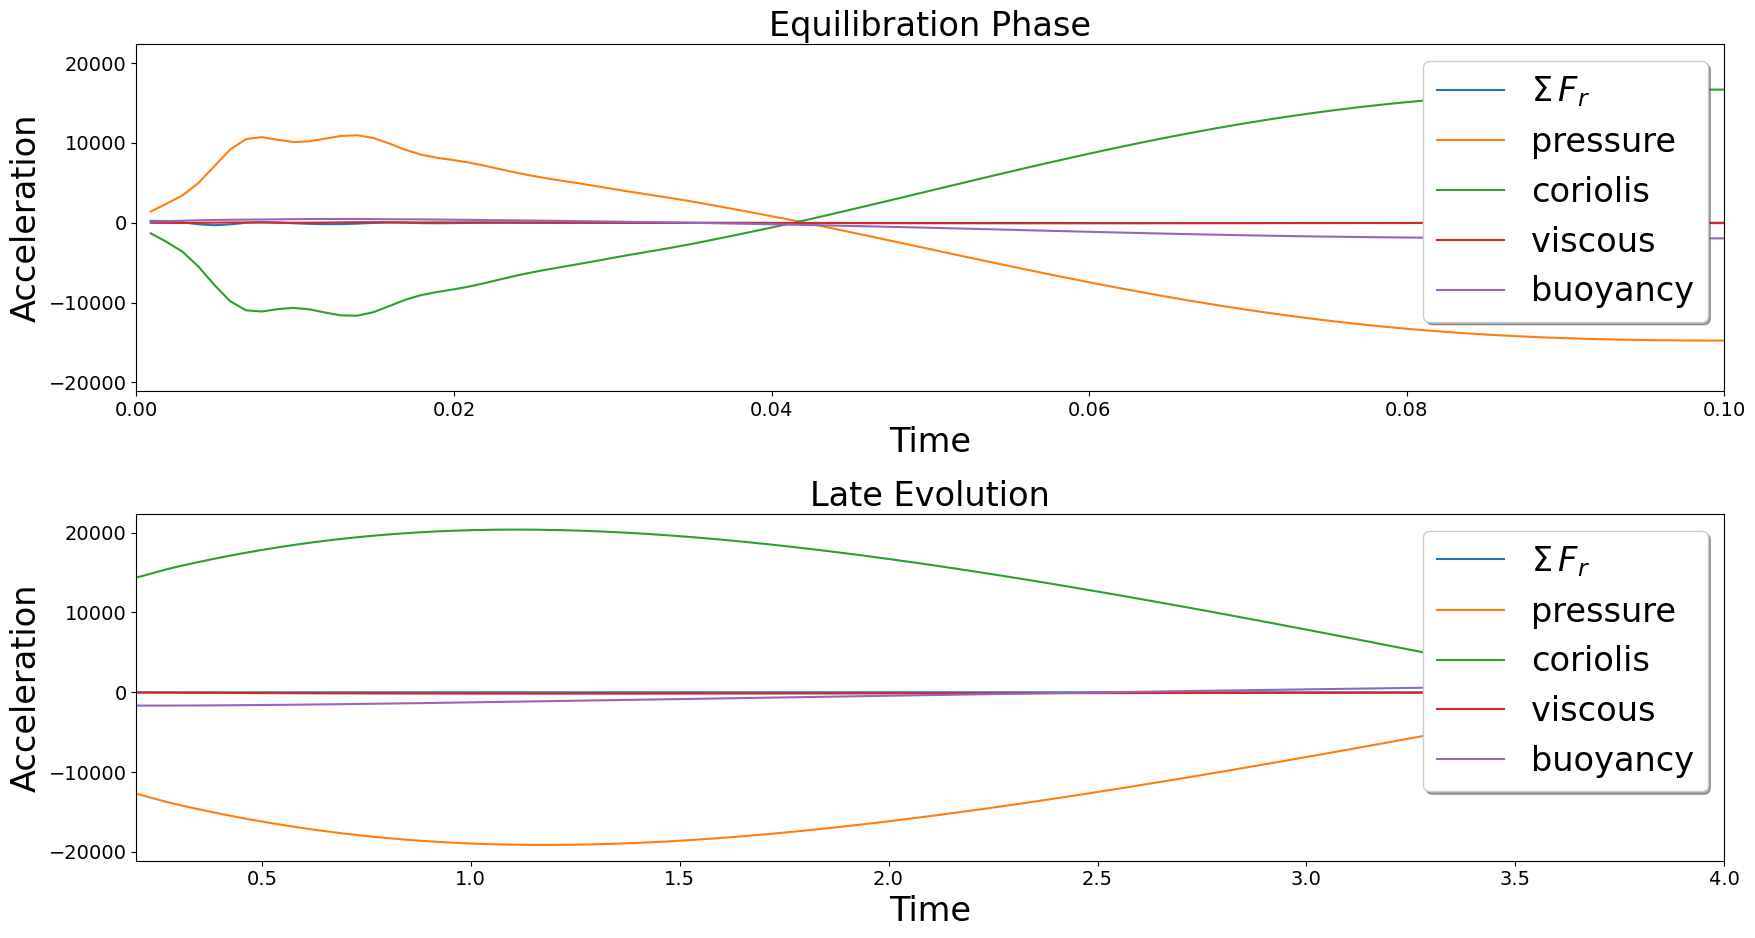

In [25]:
from rayleigh_diagnostics import Point_Probes,  build_file_list
import numpy
from matplotlib import pyplot as plt

#Decide which direction you want to look at (set direction = {radial,theta, or phi})
#This is used to determine the correct quantity codes below
radial = 0
theta  = 1
phi    = 2
direction=radial
# Build a list of all files ranging from iteration 0 million to 1 million
files = build_file_list(0,1000000,path='Point_Probes')
nfiles = len(files)-1


for i in range(nfiles):
    pp = Point_Probes(files[i],path='')
    if (i == 0):
        nphi = pp.nphi
        ntheta = pp.ntheta
        nr = pp.nr
        nq = pp.nq
        niter = pp.niter
        vals=numpy.zeros( (nphi,ntheta,nr,nq,niter*nfiles),dtype='float64')
        time=numpy.zeros(niter*nfiles,dtype='float64')
    vals[:,:,:,:, i*niter:(i+1)*niter] = pp.vals
    time[i*niter:(i+1)*niter]=pp.time
istring='00040000' # iteration to examine
help(pp)
##################################################
# We choose the coordinate indices **within**
# the Point-Probe array that we want to examine
# These indices start at zero and run to n_i-1
# where n_i is the number of points sampled in 
# the ith direction

# Use help(pp) after loading the Point-Probe file
# to see the Point-Probe class structure

pind = 0           # phi-index to examine
rind = 0           # r-index to examine
tind = 0           # theta-index to examine


pp   = Point_Probes(istring)
lut  = pp.lut

nt   = pp.niter


#######################################################################
#  Grab velocity from the point probe data
u  = vals[pind,0,rind,pp.lut[1+direction],:]
dt=time[1]-time[0]


###########################################################################
# Use numpy to compute time-derivative of u
# (necessary to compute a smooth effective pressure without outputing every timestep)

#Depending on Numpy version, gradient function takes either time (array) or dt (scalar)
try:
    dudt = numpy.gradient(u,time)
except:
    dt = time[1]-time[0]  # Assumed to be constant...
    dudt = numpy.gradient(u,dt) 



################################################################
#      Forces (modulo pressure)
# Note the minus sign for advection.  Advective terms are output as u dot grad u, not -u dot grad u
advec = -vals[ pind, tind, rind, lut[1201 + direction], :] 
cor   = vals[ pind, tind, rind, lut[1219 + direction], :]
visc  = vals[ pind, tind, rind, lut[1228 + direction], :]
forces = visc+cor+advec
if (direction == radial):
    buoy  = vals[ pind, tind, rind, lut[1216], :]
    forces = forces+buoy


############################################3
# Construct effective pressure force
pres = dudt-forces
forces = forces+pres
############################################################
# Set up the plot
yfsize='xx-large'  # size of y-axis label

ustrings = [r'u_r', r'u_\theta', r'u_\phi']
ustring=ustrings[direction]
dstring = r'$\frac{\partial '+ustring+'}{\partial t}$'
fstrings = [r'$\Sigma\,F_r$' , r'$\Sigma\,F_\theta$' , r'$\Sigma\,F_\phi$' ]
fstring = fstrings[direction]
diff_string = dstring+' - '+fstring

pstring = 'pressure'
cstring = 'coriolis'
vstring = 'viscous'
bstring = 'buoyancy'
fig, axes = plt.subplots(nrows=2, figsize=(7*2.54, 9.6))
ax0 = axes[0]
ax1 = axes[1]


########################################
# Upper: dur/dt and F_total
#mpl.rc('xtick', labelsize=20) --- still trying to understand xtick label size etc.
#mpl.rc('ytick', labelsize=20)

ax0.plot(time,forces, label = fstring)
ax0.plot(time,pres,label=pstring)
ax0.plot(time,cor,label=cstring)
ax0.plot(time,visc,label=vstring)
if (direction == radial):
    ax0.plot(time,buoy,label=bstring)
ax0.set_xlabel('Time', size=yfsize)

ax0.set_ylabel('Acceleration', size=yfsize)
ax0.set_title('Equilibration Phase',size=yfsize)
ax0.set_xlim([0,0.1])
leg0 = ax0.legend(loc='upper right', shadow=True, ncol = 1, fontsize=yfsize) 

##########################################
# Lower:  Numpy Gradient Approach
ax1.plot(time,forces,label=fstring)
ax1.plot(time,pres,label=pstring)
ax1.plot(time,cor,label=cstring)
ax1.plot(time,visc,label=vstring)
if (direction == radial):
    ax1.plot(time,buoy,label=bstring)
ax1.set_title('Late Evolution',size=yfsize)
ax1.set_xlabel('Time',size=yfsize)
ax1.set_ylabel('Acceleration', size =yfsize)
ax1.set_xlim([0.2,4])
leg1 = ax1.legend(loc='upper right', shadow=True, ncol = 1, fontsize=yfsize)


plt.tight_layout()
plt.show()


X.  Modal Outputs
========


**Summary:**    Spherical Harmonic Spectral Coefficients sampled at discrete radii and degree ell. 

**Subdirectory:**  SPH_Modes

**main_input prefix:** sph_mode

**Python Classes:** SPH_Modes



**Additional Namelist Variables:**  

* sph_mode_levels (indicial) : indices along radial grid at which to output spectral coefficients.

* sph_mode_levels_nrm (normalized) : normalized radial grid coordinates at which to output spectral coefficients.

* sph_mode_ell : Comma-separated list of spherical harmonic degree ell to output.


The Modal output type allows us to output a restricted set of complex spherical harmonic coefficients at discrete radii.  For each specified ell-value, all associated azimuthal wavenumbers are output.

This output can be useful for storing high-time-cadence spectral data for a few select modes.  In the example below, we illustrate how to read in this output type, and we plot the temporal variation of the real and complex components of radial velocity for mode ell = 4, m = 4.


Examining the *main_input* file, we see that the following output values have been denoted for the Shell Spectra (see *rayleigh_output_variables.pdf* for mathematical formulae):


| Menu Code  | Description |
|------------|-------------|
| 1          | Radial Velocity |
| 2          | Theta Velocity |
| 3          | Phi Velocity  |

We also see that ell=2,4,8 have been selected in the *main_input* file, leading to power at the following modes:

|ell-value | m-values |
|----------|---------------|
| 2        | 0,1,2 |
| 4        | 0,1,2,3,4 |
| 8        | 0,1,2,3,4,5,6,7,8 |



Help on SPH_Modes in module rayleigh_diagnostics object:

class SPH_Modes(builtins.object)
 |  SPH_Modes(filename='none', path='SPH_Modes/')
 |  
 |  Rayleigh SPH Mode Structure
 |  ----------------------------------
 |  self.niter                                    : number of time steps
 |  self.nq                                       : number of diagnostic quantities output
 |  self.nr                                       : number of shell slices output
 |  self.nell                                     : number of ell values
 |  self.qv[0:nq-1]                               : quantity codes for the diagnostics output
 |  self.radius[0:nr-1]                           : radii of the shell slices output
 |  self.rad_inds[0:nr-1]                         : radial indices of the shell slices output (from the full simulation radial grid) 
 |                                                : corresponding to each point in self.radius
 |  self.inds                                     : same

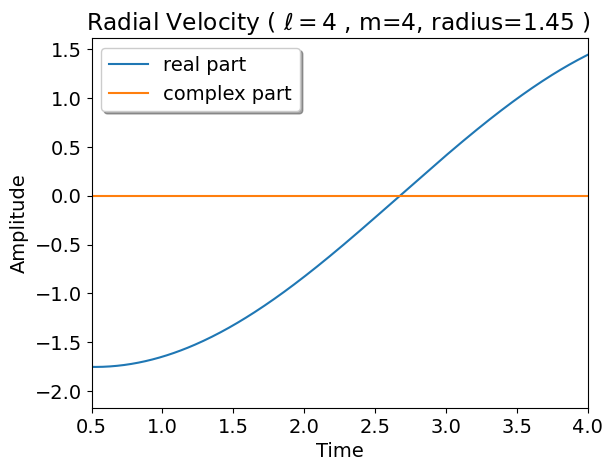

In [31]:
from rayleigh_diagnostics import SPH_Modes, build_file_list
import matplotlib.pyplot as plt
import numpy

qind = 1  # Radial velocity
rind = 0  # First radius stored in file


files = build_file_list(0,1000000,path='SPH_Modes')
nfiles = len(files)
for i in range(nfiles):
    spm = SPH_Modes(files[i],path='')
    if (i == 0):
        nell = spm.nell
        nr = spm.nr
        nq = spm.nq
        niter = spm.niter
        lvals = spm.lvals
        max_ell = numpy.max(lvals)
        nt = niter*nfiles
        vr = spm.lut[qind]
        vals=numpy.zeros( (max_ell+1,nell,nr,nq,nt),dtype='complex64')
        time=numpy.zeros(nt,dtype='float64')
    vals[:,:,:,:, i*niter:(i+1)*niter] = spm.vals
    time[i*niter:(i+1)*niter]=spm.time
help(spm)
#####################################################3
# Print some information regarding the bookkeeping
print('...........')
print(' Contents')
print('  nr = ', nr)
print('  nq = ', nq)
print('  nt = ', nt)
for i in range(nell):
    lstring=str(lvals[i])
    estring = 'Ell='+lstring+' Complex Amplitude : vals[0:'+lstring+','+str(i)+',0:nr-1,0:nq-1,0:nt-1]'
    print(estring)
print(' First dimension is m-value.')
print('...........')

######################################
# Create a plot of the ell=4, m=4 real and imaginary amplitudes
radius = spm.radius[rind]
lfour_mfour = vals[4,1,rind,vr,:]
fig, ax = plt.subplots()
ax.plot(time,numpy.real(lfour_mfour), label='real part')
ax.plot(time,numpy.imag(lfour_mfour), label='complex part')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
rstring = "{0:4.2f}".format(radius)
ax.set_title(r'Radial Velocity ( $\ell=4$ , m=4, radius='+rstring+' ) ')
ax.legend(shadow=True)
ax.set_xlim([0.5,4.0])
plt.show()